**Abstract**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

In [1]:
# Importing the necessary components
import scipy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Insuring the notebook's graphs are seaborn standard
sns.set()

In [2]:
# Loading the dataset into a dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(n=10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Checking the shape of dataset
df.shape

(5110, 12)

In [4]:
# Checking for null values in the datasets
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Imputing the null values (Replacing the missing or null values with a particular value in the entire dataset)
from sklearn.impute import SimpleImputer

# Imputing the null values with the mode of the column
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
# Checking if there are any null values left over after imputing the null values
df_imputed.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# Finding the unique values in the columns to make sure no typos exist
for i in df_imputed.columns:
    print(i)
    print()
    # Converting the dataframe object to a list then turning that list into a set
    print(set(df_imputed[i].tolist()))
    print()

id

{32776, 65564, 65574, 32826, 67, 32840, 77, 84, 91, 65632, 99, 65636, 65643, 65644, 32884, 121, 129, 65667, 132, 65673, 65680, 65688, 156, 65693, 65697, 65698, 163, 170, 172, 65712, 187, 65729, 65731, 205, 32974, 210, 65748, 224, 65766, 239, 33009, 242, 247, 65794, 259, 65801, 33035, 65814, 33051, 33064, 298, 65836, 65842, 65849, 315, 33085, 33087, 321, 33102, 338, 33115, 347, 65888, 354, 33123, 355, 65892, 65894, 65895, 364, 365, 65907, 33142, 33144, 33162, 394, 33167, 33175, 65944, 65946, 33185, 33187, 65955, 65962, 65966, 65969, 65970, 448, 452, 65988, 458, 65998, 464, 66006, 66014, 33247, 479, 33252, 491, 507, 66051, 33284, 66065, 530, 33298, 66067, 533, 66071, 33308, 542, 66080, 545, 66083, 559, 563, 66110, 575, 579, 587, 33367, 33370, 621, 66159, 33400, 33401, 33404, 66174, 641, 33410, 33412, 66184, 66196, 66204, 33439, 66220, 33454, 33462, 33478, 711, 712, 33486, 721, 66258, 724, 727, 728, 66264, 66270, 737, 739, 742, 751, 66287, 33525, 33526, 33528, 760, 33532, 768, 66306, 

AxesSubplot(0.125,0.11;0.775x0.77)


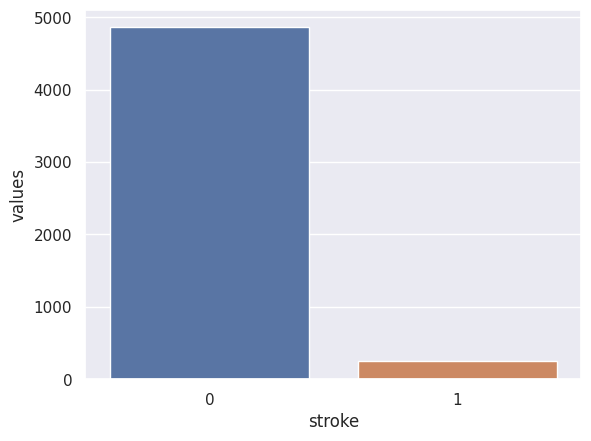

In [8]:
# Checking for label imbalance 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a temporary dataframe to check how many times a particular value/class has occured
temp=df_imputed["stroke"].value_counts()
temp_df= pd.DataFrame({'stroke': temp.index,'values': temp.values})
print(sns.barplot(x = 'stroke', y="values", data=temp_df))

In [9]:
# Checking the data types of the main dataframe
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# Finding the distribution of the data and making sure it follows a normal distribution (bell curve)
def distplots(col):
    sns.histplot(
    df[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
    plt.show()
    
# Looping through each column except for object data types
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

In [11]:
# Finding the outliers within the data using boxplots
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [12]:
# Printing statistical information about the dataset to make sure the dataset is correct
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [13]:
# Checking the number of rows with 0 to later correct the dataset if 0s are present
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]

  print(col + ": "+str(missing_rows))

Number of rows with 0 values for each variable
id: 0
gender: 0
age: 0
hypertension: 4612
heart_disease: 4834
ever_married: 0
work_type: 0
Residence_type: 0
avg_glucose_level: 0
bmi: 0
smoking_status: 0
stroke: 4861


In [14]:
# Labeling encoding to convert categorical values to numerical values since the bare nuclei variable is supposed to be an integer
from sklearn import preprocessing

# Applying preprocessing to the entire dataframe
df=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df.dtypes

id                   int64
gender               int64
age                  int64
hypertension         int64
heart_disease        int64
ever_married         int64
work_type            int64
Residence_type       int64
avg_glucose_level    int64
bmi                  int64
smoking_status       int64
stroke               int64
dtype: object

In [15]:
# Saving the preprocessed dataframe as a .csv file
df.to_csv("Strokes_Pre-Processed.csv")

<AxesSubplot: >

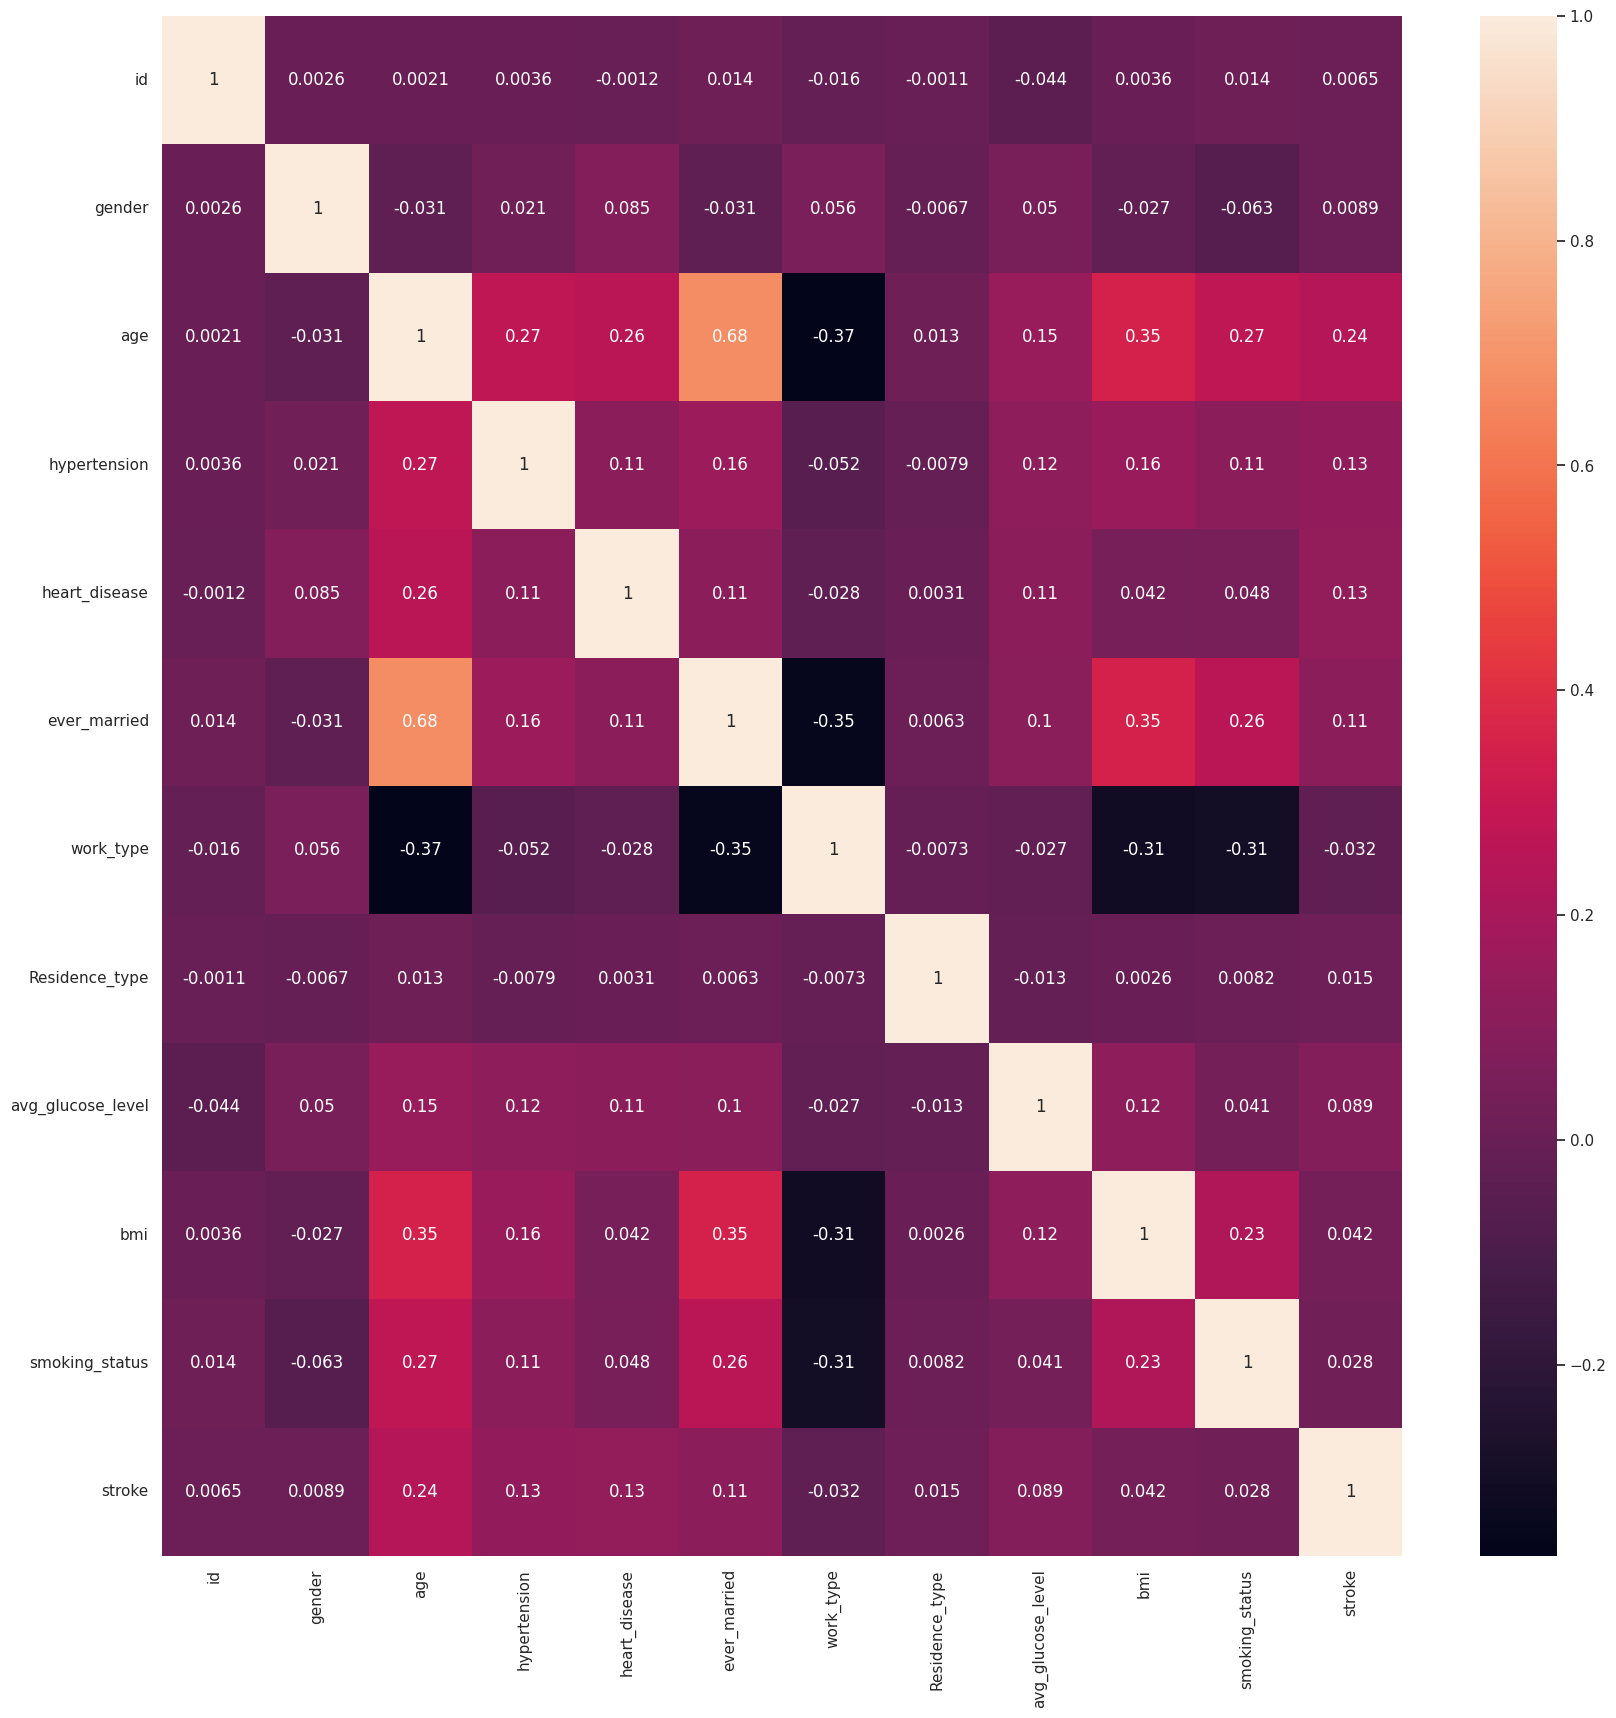

In [16]:
# Finding the correlations between the variables using a heatmap
# High correlations between two independent variables will cause issues
plt.figure(figsize=(20,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [17]:
# Seperating the independent and dependent variables and dropping the ID column
x=df.drop(["id", "stroke"],axis=1)
y=df["stroke"]

In [18]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 4861, 1: 249})


In [19]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({1: 4861, 0: 4861})


In [20]:
# Scaling using the MinMaxScaler to ensure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [21]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(9722, 10)
(9722, 8)


In [22]:
# Splitting the dataset into the training and testing datasets while preserving 20% of the data for testing and 80% of the data for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)
# Making a second split to create the final training dataset and the validation dataset (the dataset that allows hyperparamter tuning/tuning the number of hidden layers with unbiased data)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [23]:
# Creating a Bagging Decision Tree model that uses multiple samples with replacement from the training data to train on
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Using 50% of each sample in the dataset, all features, and 10 decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

In [24]:
# Predicting strokes
Target_Classifcation = model.predict(x_test)
Target_Classifcation  = (Target_Classifcation >0.5)
# Creating a confusion matrix to check how many true positives (top left), false positives (top right), false negatives (bottom left), and true negatives (bottom right) the model produced
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, Target_Classifcation))

Confusion Matrix:
[[ 899   44]
 [   0 1002]]


In [25]:
# Obtaining an F1 score that is a weighted average of the precision and recall
from sklearn.metrics import f1_score

f1_score(y_test,model.predict(x_test),average='binary')

0.9785156250000001

In [26]:
# Creating a classification report that displays all evaluation matrices and shows accuracy, etc.
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       943
           1       0.96      1.00      0.98      1002

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



In [27]:
# Importing the necessary components to create an ROC Curve and Precision/Recall Curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix


# Creating a function to plot the ROC Curve to check the true positive to false negative rate and make sure the model is appropriate
def plot_auc(t_y, p_y):
    # fpr = False Positive Rate, tpr = True Positive Rate
    # Precision/True Positive Rate (TPR) = True Positive / (True Positive + False Negative)
    # Recall/False Positive Rate (FPR) = False Positive /(True Negative + False Positive)
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# Creating a function to plot the Precision/Recall Curve Precision, recall, and thresholds are used.
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

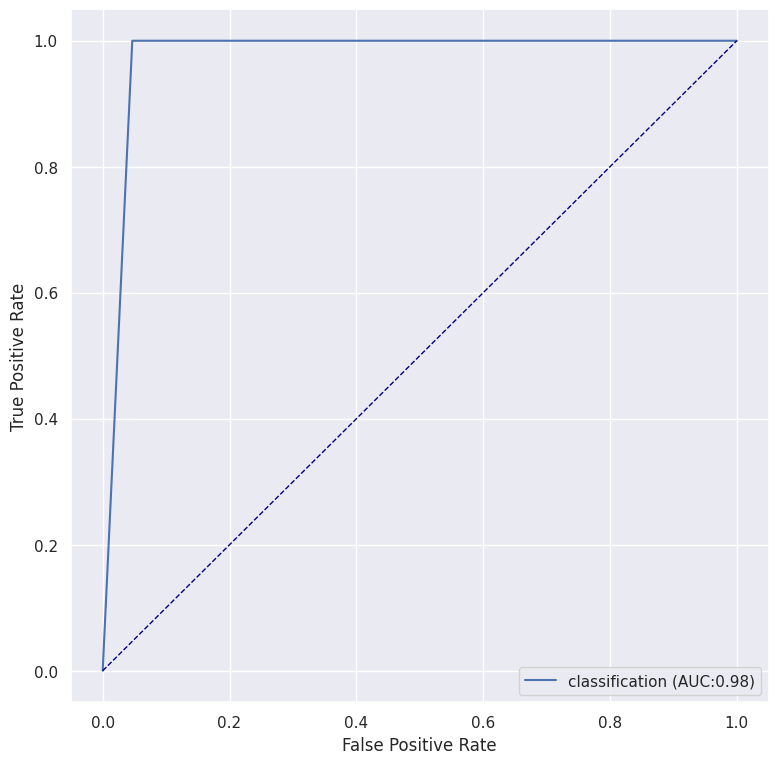

In [28]:
# Creating an ROC Curve using the ROC curve-generating function
# The closer the AUC is to 1, the better the model
plot_auc(y_test, model.predict(x_test))

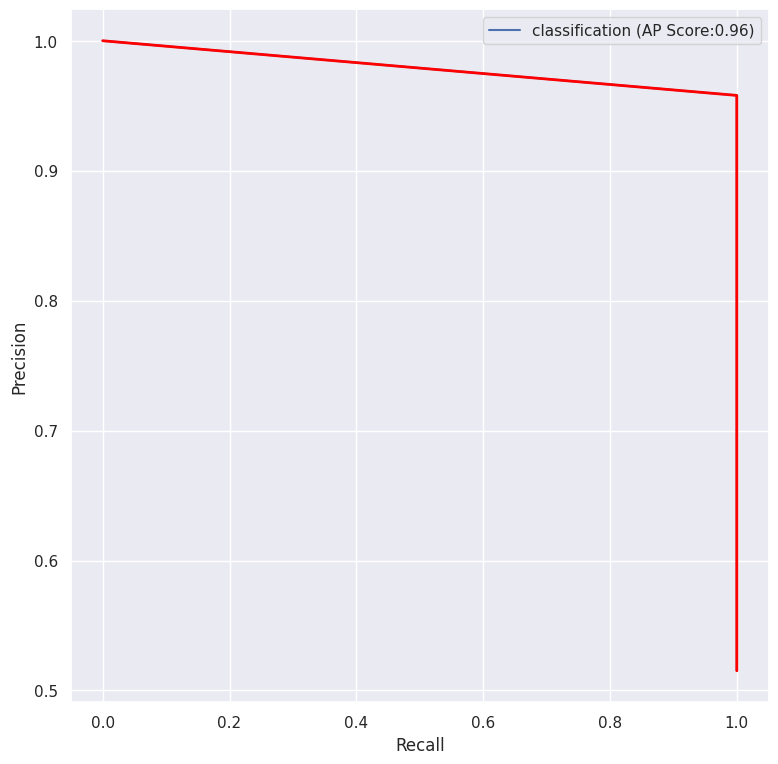

In [29]:
# Plotting the Precision/Recall Curve to check the tradeoff between precision (ratio of the retrieved items that are relevant) and recall (the ratio of relevant items that are retrieved)
plot_precision_recall_curve_helper(y_test, model.predict(x_test))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd7fbb68-9831-4dbd-a791-a6d50615ff5b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>